<center>
    <img src="https://www.maclocks.com/media/logo/stores/4/maclocks.png" width="200" alt="logo"  />
        
</center>


<h1 align="center"><font size="5"> Part Recommender system - Machine learning with Python </font></h1>

### Objective 
Based on the history with other resellers, advice the sales team which product & to which reseller to recommend.

### About dataset

This dataset is about past sales. The **sales.csv** data set includes details of 30,000 transactions with the different qty of sales. It includes following fields:

| Field             | Description                                                                           |
| --------------    | ------------------------------------------------------------------------------------- |
| Qty               | Qty of Items Sold                                                                     |
| Qty Rank          | Qty Rank of Items Sold                                                                |
| Sales             | Amount Sales                                                                          |
| SKU               | Item                                                                                  |
| Family - Priority | Item Group                                                                            |
| Family A          | Item Group                                                                            |
| Family B          | Item Group                                                                            |
| Family C          | Item Group                                                                            |
| Resellers         | Reseller                                                                              |
| Distributor       | Distributor                                                                           |
| Channel           | Channel                                                                               |
| Country           | Country                                                                               |
| Region            | Region                                                                                |                                                    
| Quarter           | Period                                                                                |
| Year              | Period                                                                                |



 
 <hr>
<a id="ref3"></a>

### Preliminary plan

Clusterize 
- Resellers by Qty, Channel, Region, Families
- SKUs by Qty, Families, Countries, Quarter

Build Recommendation Systems
- Recommend products from the same cluster
- Collaborative Filtering : Recommend products which were bought by other resellers


<hr>

<a id="ref2"></a>

# Preprocessing

In [1]:
# load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a725b56cc1104f22ba91fc31bb4ccc4f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0ch3TOlTuyTpCA87FMueq6is2YhtRLypSfxabvJ7xAwl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a725b56cc1104f22ba91fc31bb4ccc4f.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-3njyd76mwxst9c',Key='sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Channel,Channel detailed,Country - from Priority,Cust. Group Code,Year,Quarter,Distributor,Qty Rank,Qty,Rep. Priority,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
0,B2B,B2B,NaN,NaN,2019,1,A.B. Distributing,1,1,NaN,34.47,101B,CDW,US,USA,Don,Counter Stands,Display Solutions,Stand Mounts,Universal
1,B2B,B2B,NaN,NaN,2019,1,A.B. Distributing,1,1,NaN,28.29,101B,Insight,US,USA,Don,Counter Stands,Display Solutions,Stand Mounts,Universal
2,B2B,B2B,NaN,NaN,2019,1,A.B. Distributing,1,2,NaN,193.14,101B213EXENB,CDW,US,USA,Don,Executive bundles,Display Solutions,Bundles,Apple
3,B2B,B2B,NaN,NaN,2019,1,A.B. Distributing,1,2,NaN,193.14,101B213EXENB,PC Connection,US,USA,Don,Executive bundles,Display Solutions,Bundles,Apple
4,B2B,B2B,NaN,NaN,2019,1,A.B. Distributing,1,2,NaN,193.14,101B224SENB,CDW,US,USA,Don,Space bundles - Apple devices,Display Solutions,Bundles,Apple


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


In [3]:
df['Region'].value_counts()

USA               11782
UK & Ireland       3030
Scandinavia        2805
DACH               2530
France             2450
Canada             1801
Benelux            1584
Australia & NZ     1301
Iberia              740
APAC                650
Italy               559
Eastern Europe      376
LatAm               216
Middle East          71
Israel               63
Caribbean             8
Name: Region, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f291ef90fd0>]],
      dtype=object)

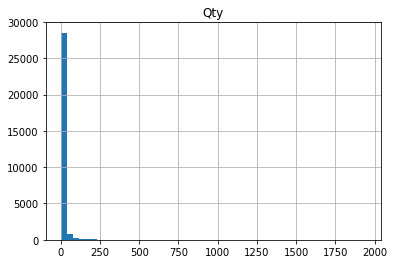

In [4]:
df.hist(column='Qty', bins=50)

### Feature set


In [5]:
#encoding https://datascience.stackexchange.com/questions/14069/mass-convert-categorical-columns-in-pandas-not-one-hot-encoding

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])
    
df.head()

,Channel,Channel detailed,Country - from Priority,Cust. Group Code,Year,Quarter,Distributor,Qty Rank,Qty,Rep. Priority,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
0,0,0,-1,NaN,2019,1,0,1,1,-1,34.47,0,0,0,0,0,0,0,0,0
1,0,0,-1,NaN,2019,1,0,1,1,-1,28.29,0,1,0,0,0,0,0,0,0
2,0,0,-1,NaN,2019,1,0,1,2,-1,193.14,1,0,0,0,0,1,0,1,1
3,0,0,-1,NaN,2019,1,0,1,2,-1,193.14,1,2,0,0,0,1,0,1,1
4,0,0,-1,NaN,2019,1,0,1,2,-1,193.14,2,0,0,0,0,2,0,1,1


In [6]:
df.columns

Index(['Channel', 'Channel detailed ', 'Country - from Priority',
       'Cust. Group Code', 'Year', 'Quarter', 'Distributor', 'Qty Rank', 'Qty',
       'Rep. Priority', 'Sales', 'SKU', 'Resellers', 'Country', 'Region',
       'Rep. Region', 'Family - Priority', 'Family A', 'Family B', 'Family C'],
      dtype='object')

In [7]:
#Convert NaN & empty string to 0

nan_value = float("NaN")
df.replace(nan_value, 0, inplace=True)
df.replace("", 0, inplace=True)
# df.dropna(inplace=True)
df = df.reset_index()
del df['index']
df = df.reindex()
df.head()

,Channel,Channel detailed,Country - from Priority,Cust. Group Code,Year,Quarter,Distributor,Qty Rank,Qty,Rep. Priority,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
0,0,0,-1,0.0,2019,1,0,1,1,-1,34.47,0,0,0,0,0,0,0,0,0
1,0,0,-1,0.0,2019,1,0,1,1,-1,28.29,0,1,0,0,0,0,0,0,0
2,0,0,-1,0.0,2019,1,0,1,2,-1,193.14,1,0,0,0,0,1,0,1,1
3,0,0,-1,0.0,2019,1,0,1,2,-1,193.14,1,2,0,0,0,1,0,1,1
4,0,0,-1,0.0,2019,1,0,1,2,-1,193.14,2,0,0,0,0,2,0,1,1


In [8]:
df.shape

(29999, 20)

In [9]:
X = df[['Channel', 'Channel detailed ', 'Country - from Priority',
       'Cust. Group Code', 'Year', 'Quarter', 'Distributor', 'Qty Rank', 'Qty',
       'Rep. Priority', 'Sales', 'Resellers', 'Country', 'Region',
       'Rep. Region', 'Family - Priority', 'Family A', 'Family B', 'Family C']].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


X[0:5]

array([[-0.5288261 , -0.48153974, -0.28240362, -0.58900212, -0.71291328,
        -1.12155093, -0.500235  , -0.16353556, -0.20952428, -0.37446889,
        -0.20685335, -0.87327366, -0.88703392, -0.96393819, -0.9361327 ,
        -1.57708767, -0.86479874, -1.3453696 , -0.91444333],
       [-0.5288261 , -0.48153974, -0.28240362, -0.58900212, -0.71291328,
        -1.12155093, -0.500235  , -0.16353556, -0.20952428, -0.37446889,
        -0.2091363 , -0.87269545, -0.88703392, -0.96393819, -0.9361327 ,
        -1.57708767, -0.86479874, -1.3453696 , -0.91444333],
       [-0.5288261 , -0.48153974, -0.28240362, -0.58900212, -0.71291328,
        -1.12155093, -0.500235  , -0.16353556, -0.18798865, -0.37446889,
        -0.14823902, -0.87327366, -0.88703392, -0.96393819, -0.9361327 ,
        -1.48591762, -0.86479874, -1.11470164, -0.05124681],
       [-0.5288261 , -0.48153974, -0.28240362, -0.58900212, -0.71291328,
        -1.12155093, -0.500235  , -0.16353556, -0.18798865, -0.37446889,
        -0.148

In [10]:
y = df['SKU'].values
y[0:5]

array([0, 0, 1, 1, 2])

### Train Test Split


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (23999, 19) (23999,)
Test set: (6000, 19) (6000,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Find best K

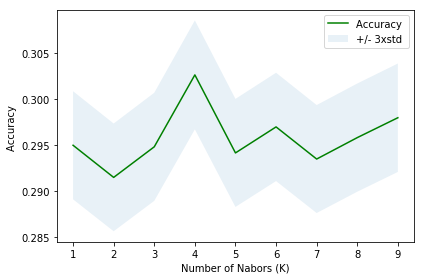

The best accuracy was with 0.30266666666666664 with k= 4


In [13]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# K Nearest Neighbor(KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model
k = 4
model_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)


# Decision Tree


In [15]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine


In [16]:
#Modeling (SVM with Scikit-learn)

from sklearn import svm

model_SVM = svm.SVC(kernel='rbf')

model_SVM.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression


In [17]:
# Modeling (Logistic Regression with Scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


model_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Model Evaluation using Test set


In [19]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# ACCURACY SCORES 
yhat_KNN = model_KNN.predict(X_test)

knn_jaccard = jaccard_similarity_score(y_test, yhat_KNN)
knn_f1_score = f1_score(y_test, yhat_KNN, average='weighted')

# Decission tree 
yhat_DT = model_DT.predict(X_test)

tree_jaccard = jaccard_similarity_score(y_test, yhat_DT)
tree_f1_score = f1_score(y_test, yhat_DT, average='weighted')

# SVM 
yhat_SVM = model_SVM.predict(X_test)

svm_jaccard = jaccard_similarity_score(y_test, yhat_SVM)
svm_f1_score = f1_score(y_test, yhat_SVM, average='weighted')


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/pyth

# Logistic regression 
yhat_LR = model_LR.predict(X_test)
yhat_proba = model_LR.predict_proba(X_test)

lr_jaccard = jaccard_similarity_score(y_test, yhat_LR)
lr_f1_score = f1_score(y_test, yhat_LR, average='weighted')
lr_log_loss = log_loss(y_test, yhat_proba)

In [21]:
report = pd.DataFrame(data=np.array([["KNN", knn_jaccard, knn_f1_score, np.nan],
                                     ["Decision Tree", tree_jaccard, tree_f1_score, np.nan],
                                    ["SVM", svm_jaccard, svm_f1_score, np.nan] 
                                     #,["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]
                                    ]), 
                      columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.30266666666666664,0.27776051037825983,nan
Decision Tree,0.24233333333333335,0.11203261046440696,nan
SVM,0.36483333333333334,0.27724947116269033,nan


In [22]:
for i in yhat[0:10]:
    print(label_mapping['SKU'][i])

WDG08
140B
CL15UTL
CL15
ATVEN35
102IPDSB
UCLGSTDB
MMEN76
WDG08
MBPRLDGTB01
